Teste da resolução

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# Carregar o arquivo CSV
df = pd.read_csv('pre-processed.csv')

# Inicializar o stemmer
stemmer = PorterStemmer()

# Função para tokenizar e aplicar stemming
def tokenize_and_stem(text):
    tokens = word_tokenize(text)  # Tokenização
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Aplicar stemming
    return stemmed_tokens

# Aplicar o processo à coluna de texto 'preprocessed_news'
df['tokenized_stemmed_news'] = df['preprocessed_news'].apply(tokenize_and_stem)

# Embaralhar o dataframe
df = shuffle(df, random_state=42)

# Juntar os tokens em uma string única
df['tokenized_stemmed_news_str'] = df['tokenized_stemmed_news'].apply(lambda x: ' '.join(x))

# Inicializar o vetorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Calcular o TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df['tokenized_stemmed_news_str'])

# Definir as labels
y = df['label']

# Aplicar o undersampling para balancear as classes
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_tfidf, y)

# Dividir os dados balanceados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Treinar o modelo de Regressão Logística
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Fazer previsões
y_pred = classifier.predict(X_test)

# Avaliar o modelo
print('-------------------------------------------')
print('RU 4280155')
print('-------------------------------------------')
print('                                           ')
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Obter as features do TF-IDF
features = tfidf_vectorizer.get_feature_names_out()

# Separar as features entre unigrams, bigrams e trigrams
unigrams = [feature for feature in features if len(feature.split()) == 1]
bigrams = [feature for feature in features if len(feature.split()) == 2]
trigrams = [feature for feature in features if len(feature.split()) == 3]

# Mostrar a quantidade de unigrams, bigrams e trigrams
print(f"Total de unigrams: {len(unigrams)}")
print(f"Total de bigrams: {len(bigrams)}")
print(f"Total de trigrams: {len(trigrams)}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-------------------------------------------
RU 4280155
-------------------------------------------
                                           
Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

        fake       0.94      0.98      0.96       915
        true       0.98      0.93      0.96       885

    accuracy                           0.96      1800
   macro avg       0.96      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800

Total de unigrams: 67045
Total de bigrams: 1435081
Total de trigrams: 2243695


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


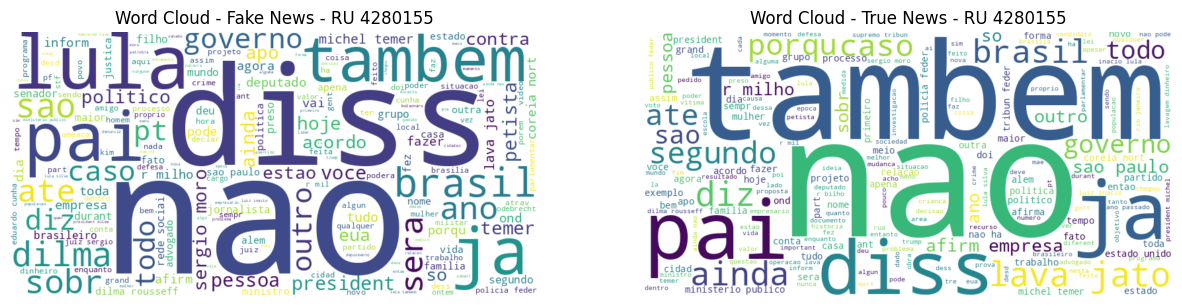

In [ ]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Baixar as stopwords para português, se ainda não estiverem baixadas
nltk.download('stopwords')

# Obter as stopwords em português
stopwords_pt = set(stopwords.words('portuguese'))

# Filtrar os dados para 'fake' e 'true'
df_fake = df[df['label'] == 'fake']
df_true = df[df['label'] == 'true']

# Concatenar todas as palavras de cada grupo
all_words_fake = ' '.join(df_fake['tokenized_stemmed_news_str'])
all_words_true = ' '.join(df_true['tokenized_stemmed_news_str'])

# Gerar as Word Clouds com as stopwords em português
wordcloud_fake = WordCloud(stopwords=stopwords_pt, width=800, height=400, background_color='white').generate(all_words_fake)
wordcloud_true = WordCloud(stopwords=stopwords_pt, width=800, height=400, background_color='white').generate(all_words_true)

# Exibir as duas Word Clouds lado a lado
plt.figure(figsize=(15, 7))

# Word Cloud para 'fake'
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake News - RU 4280155')
plt.axis('off')

# Word Cloud para 'true'
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud - True News - RU 4280155')
plt.axis('off')

# Mostrar as Word Clouds
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Juntar os tokens em uma string única
df['tokenized_stemmed_news_str'] = df['tokenized_stemmed_news'].apply(lambda x: ' '.join(x))

# Inicializar o vetorizador TF-IDF para incluir unigramas, bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Calcular o TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df['tokenized_stemmed_news_str'])
y = df['label']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Logística
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Fazer previsões
y_pred = classifier.predict(X_test)

# Avaliar o modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Obter as features do TF-IDF
features = tfidf_vectorizer.get_feature_names_out()

# Separar as features entre unigrams, bigrams e trigrams
unigrams = [feature for feature in features if len(feature.split()) == 1]
bigrams = [feature for feature in features if len(feature.split()) == 2]
trigrams = [feature for feature in features if len(feature.split()) == 3]

# Mostrar a quantidade de unigrams, bigrams e trigrams
print(f"Total de unigrams: {len(unigrams)}")
print(f"Total de bigrams: {len(bigrams)}")
print(f"Total de trigrams: {len(trigrams)}")


Accuracy: 0.9451388888888889
              precision    recall  f1-score   support

        fake       0.92      0.98      0.95       723
        true       0.98      0.91      0.94       717

    accuracy                           0.95      1440
   macro avg       0.95      0.94      0.95      1440
weighted avg       0.95      0.95      0.95      1440

Total de unigrams: 67045
Total de bigrams: 1435081
Total de trigrams: 2243695


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filtrar os dados para 'fake' e 'true'
df_fake = df[df['label'] == 'fake']
df_true = df[df['label'] == 'true']

# Concatenar todas as palavras de cada grupo
fake_text = df_fake['tokenized_stemmed_news_str']
true_text = df_true['tokenized_stemmed_news_str']

# Inicializar o vetorizador TF-IDF para incluir unigramas, bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Calcular o TF-IDF para as notícias "fake"
X_fake_tfidf = tfidf_vectorizer.fit_transform(fake_text)
fake_features = tfidf_vectorizer.get_feature_names_out()

# Calcular o TF-IDF para as notícias "true"
X_true_tfidf = tfidf_vectorizer.fit_transform(true_text)
true_features = tfidf_vectorizer.get_feature_names_out()

# Separar as features entre unigrams, bigrams e trigrams para "fake"
fake_unigrams = [feature for feature in fake_features if len(feature.split()) == 1]
fake_bigrams = [feature for feature in fake_features if len(feature.split()) == 2]
fake_trigrams = [feature for feature in fake_features if len(feature.split()) == 3]

# Separar as features entre unigrams, bigrams e trigrams para "true"
true_unigrams = [feature for feature in true_features if len(feature.split()) == 1]
true_bigrams = [feature for feature in true_features if len(feature.split()) == 2]
true_trigrams = [feature for feature in true_features if len(feature.split()) == 3]

# Mostrar a quantidade de unigrams, bigrams e trigrams em textos "fake" e "true"
print(f"Total de unigrams em textos fake: {len(fake_unigrams)}")
print(f"Total de bigrams em textos fake: {len(fake_bigrams)}")
print(f"Total de trigrams em textos fake: {len(fake_trigrams)}")

print(f"Total de unigrams em textos true: {len(true_unigrams)}")
print(f"Total de bigrams em textos true: {len(true_bigrams)}")
print(f"Total de trigrams em textos true: {len(true_trigrams)}")


Total de unigrams em textos fake: 27227
Total de bigrams em textos fake: 269552
Total de trigrams em textos fake: 350944
Total de unigrams em textos true: 62763
Total de bigrams em textos true: 1253056
Total de trigrams em textos true: 1917536
